
## Práctica 4
 Simulación de una red de neuronas estocásticas, como en el ejemplo 1 de las diapositivas de la unidad 5. Implementar el modelo estocástico del artículo [1], reproduciendo los resultados y figuras del trabajo. Explique con la ayuda de las simulaciones estocásticas de redes por qué la dinámica subumbral es relevante para la propagación de frentes de onda de actividad eléctrica en la red.

#### Alvaro Alvarez
#### Miguel Angel Calderón
#### Runtian Wang
#### Alba Martinez
Bibliografía fundamental:

[1] Nazareth P. Castellanos, Francisco B. Rodriguez, P. Varona. 2003. Stochastic Networks with Subthreshold Oscillations and Spiking Activity. Lect. Notes Comput. Sc. 2686: 32-39.

[2] R. Latorre, C. Aguirre, M.I. Rabinovich, P. Varona. 2013. Transient dynamics and rhythm coordination of inferior olive spatiotemporal patterns. Frontiers in Neural Circuits 7: 138.

En primer lugar definimos el modelo estocástico de oscilaciones subumbrales y actividad de espigas. La evolución espontánea de la actividad de una neurona aislada sigue un camino aleatorio. La actividad de la neurona se considera una variable discreta y se caracteriza en el tiempo por a(t). La dinámica estocástica de una unidad aislada i viene dada por:

$$
\left \{
\begin{array}{rr}
a_i(t)+C                         \quad\text{Con probabilidad p} \\
a_i(t)                           \quad\text{En caso contrario}
\end{array}
\right .
$$



donde $C$ representa la evolución temporal de la actividad de la unidad, $p$ corresponde con la probabilidad de tránsito de su estado interno por paso de tiempo y de este modo $1-p$ es la probabilidad de permanecer en estado actual. El párametro $C$ puede adquirir tres valores:

-$C=1$ cuando la probabilidad es $p$.

-Cuando la neurona alcanza un umbral de activación, $L$, que origina un pico según un pico de probabilidad $p_{f}$. La actividad se incrementa $3L$ para modelar el evento pico y a continuación disminuye hasta el estado inicial con un valor de $C=-L$.

-Cuando la unidad consigue el umbral y no dispara, con una probabilidad $1-p_{f}$, la activación comienza a disminuir de nuevo, sin embargo en este caso $C=\frac{-L}{5}\$.

Un dato de interés antes de simular dicho modelo es la inicilización de manera aleatoria en el intervalo $[1,L]$ de la actividad inicial de cada neurona.

El acoplamiento difusivo entre unidades vecinas será empleado para la obtención de las redes. Se empleará condiciones de contorno periódicas con el objetivo de minimizar los efectos de frontera. La conexión de las neuronas se realizará con el acoplamiento eléctrico, y la regla de intercambio entre la unidad i y sus vecinas j se define por:

$$a_{i}(t)=a_{i}(t)+g\sum_{j=neighbors}[a_{j}(t-1)-a_{i}(t-1)]  $$

donde g es la conductancia del acoplamiento eléctrico, que se mantiene constante el valor en todas conexiones, y $a_{j}(t)$ es la actividad de sus vecinos. El acoplamiento eléctrico induce una sincronización local en la red en función de g.

La actividad neuronal viene determinada por el paseo aleatorio definido en la primera ecuación y la interacción de la neurona modelada en la última ecuación definida.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/Prácticas NEI/Practica 4 Francisco/P4/imgs"
!ls "/content/drive/MyDrive/Prácticas NEI/Practica 4 Francisco/P4/utils"


'BurgessC2011 Cyclic information integration system.png'
'BurgessC2011 Information integration based on frequency variation.png'
 fig2.png
 fig3.png
 fig4.png
'Place cell firing of a rat in a enclosure.png'
'Trajectory of the animal in the enclosure while grid cells fire.png'
functions.py  __pycache__


## Importamos las librerias necesarias para la creación del modelo

In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Prácticas NEI/Practica 4 Francisco/P4')

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import Image
from utils.functions import set_all_cells, dict_init_fn, create_cluster_with_dict, ParameterEnum, plot_grid_cells, random_walk, SUBTHRESHOLD

In [ ]:
STEPS = 2000
RESULTS_DIR = 'results/'
random.seed(101)
%load_ext autoreload
%autoreload 2


## Datos de entrada

######-Los valores de conductancias, $g$ se mantendrán constante.
######-Se utilizará cuatro vecinos.
######-Se aplicará una rejilla bi-dimensional de 50x50 neuronas.


## Comportamiento de una única neurona aislada





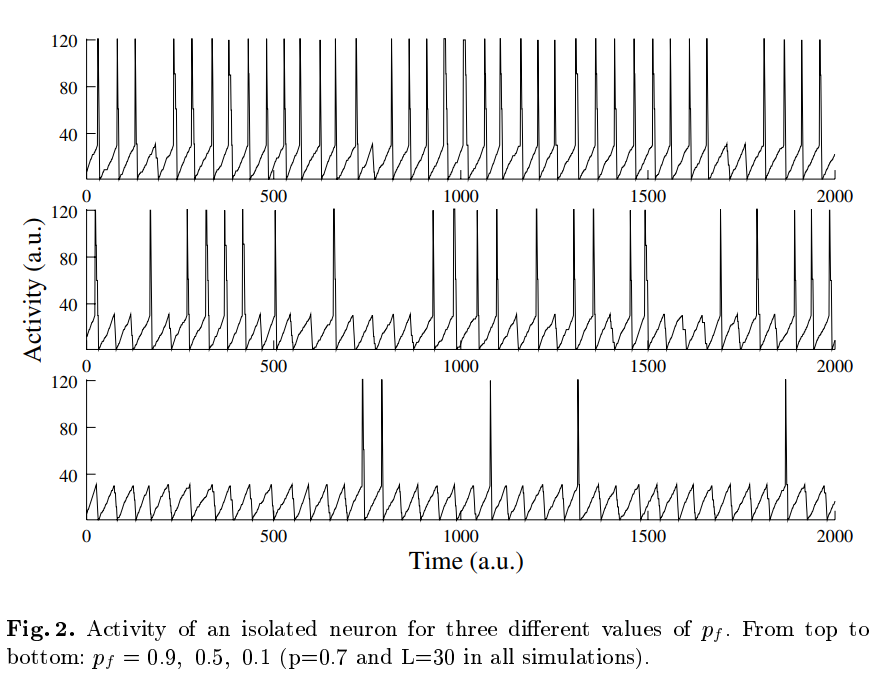

In [ ]:
image_path = '/content/drive/My Drive/Prácticas NEI/Practica 4 Francisco/P4/imgs/fig2.png'

display(Image(filename=image_path, width=500, height=300))

In [ ]:
a_ini = a_old = 0
p = 0.7
L = 30
C_p = 1
L_spike = 3 * L
C_spike = L
C_no_spike = L/5

common_values_dict = {
    ParameterEnum.A_T.name: a_ini,  # 0
    ParameterEnum.A_T_OLD.name: a_old,  # 1
    ParameterEnum.P.name: p,  # 2
    ParameterEnum.G_1.name: 0,  # 4
    ParameterEnum.G_2.name: 0,  # 5
    ParameterEnum.G_3.name: 0,  # 6
    ParameterEnum.G_4.name: 0,  # 7
    ParameterEnum.C_P.name: C_p,  # 8
    ParameterEnum.L.name: L,  # 9
    ParameterEnum.L_SPIKE.name: L_spike,  # 10
    ParameterEnum.C_SPIKE.name: C_spike,  # 11
    ParameterEnum.C_NO_SPIKE.name: C_no_spike,  # 12
    ParameterEnum.STAT.name: SUBTHRESHOLD  # 13
}

grid = np.zeros((1, 1, len(ParameterEnum)))


### Simulaciones

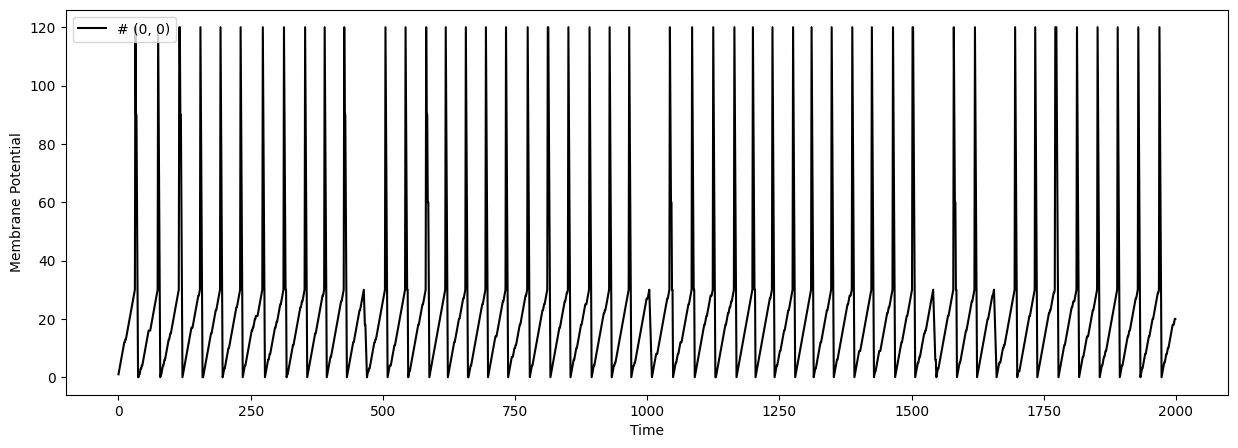

In [ ]:
p_f = 0.9
common_values_dict[ParameterEnum.P_F.name] = 1 - p_f
grid = set_all_cells(
    grid, dict_init_fn, _dict=common_values_dict)

grid_isolated_first_sim = random_walk(grid, STEPS)
plot_grid_cells(
    grid_isolated_first_sim, [(0, 0)], ['-'])


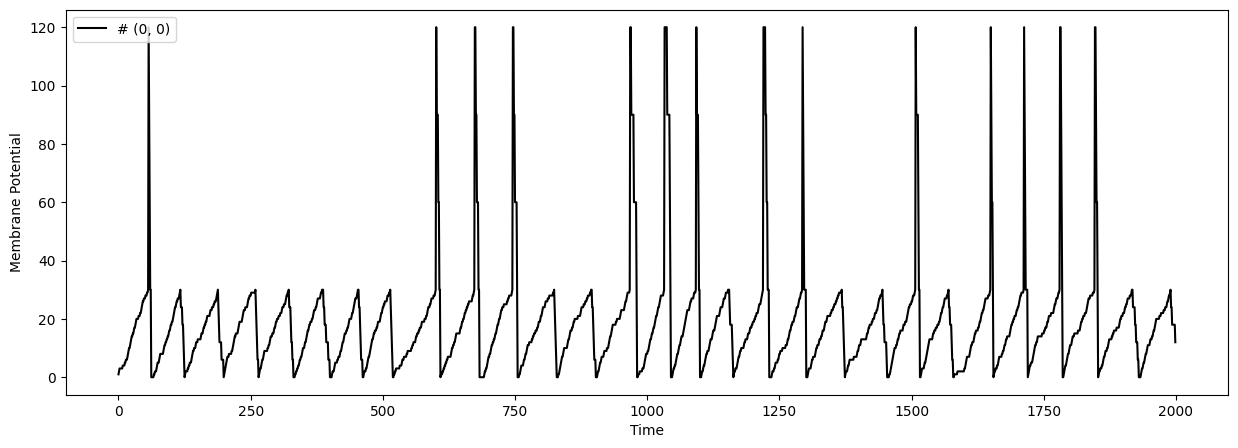

In [ ]:
p_f = 0.5
common_values_dict[ParameterEnum.P_F.name] = 1 - p_f
grid = set_all_cells(
    grid, dict_init_fn, _dict=common_values_dict)

grid_isolated_first_sim = random_walk(grid, STEPS)
plot_grid_cells(
    grid_isolated_first_sim, [(0, 0)], ['-'])


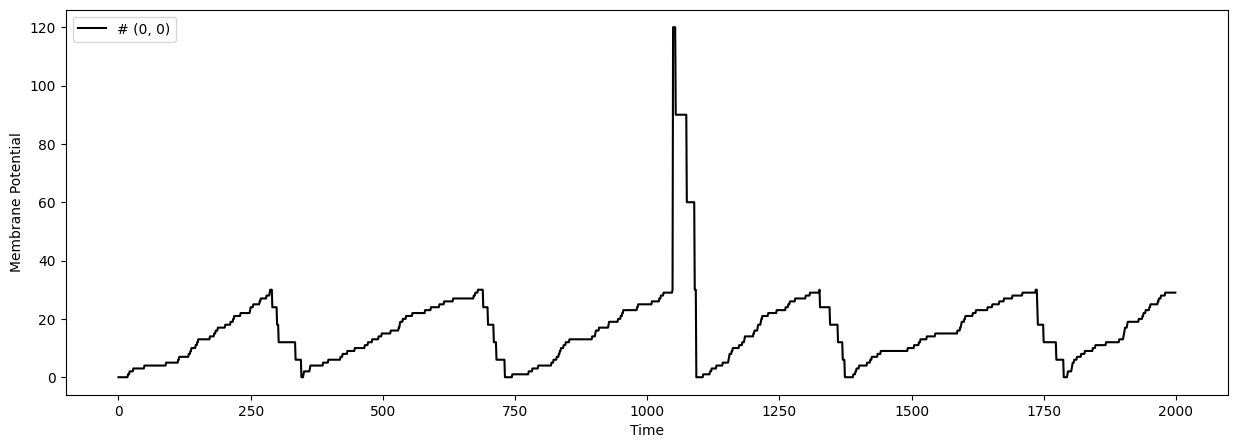

In [ ]:
p_f = 0.1
common_values_dict[ParameterEnum.P_F.name] = 1 - p_f
grid = set_all_cells(
    grid, dict_init_fn, _dict=common_values_dict)

grid_isolated_first_sim = random_walk(grid, STEPS)
plot_grid_cells(
    grid_isolated_first_sim, [(0, 0)], ['-'])


Se puede apreciar como con una probabilidad alta la neurona presenta un mayor número de potenciales de accción (disparos) que con una probabilidad más reducida, donde presenta una mayor dificultad de iniciar el potencial de acción.

## Rejilla de neuronas


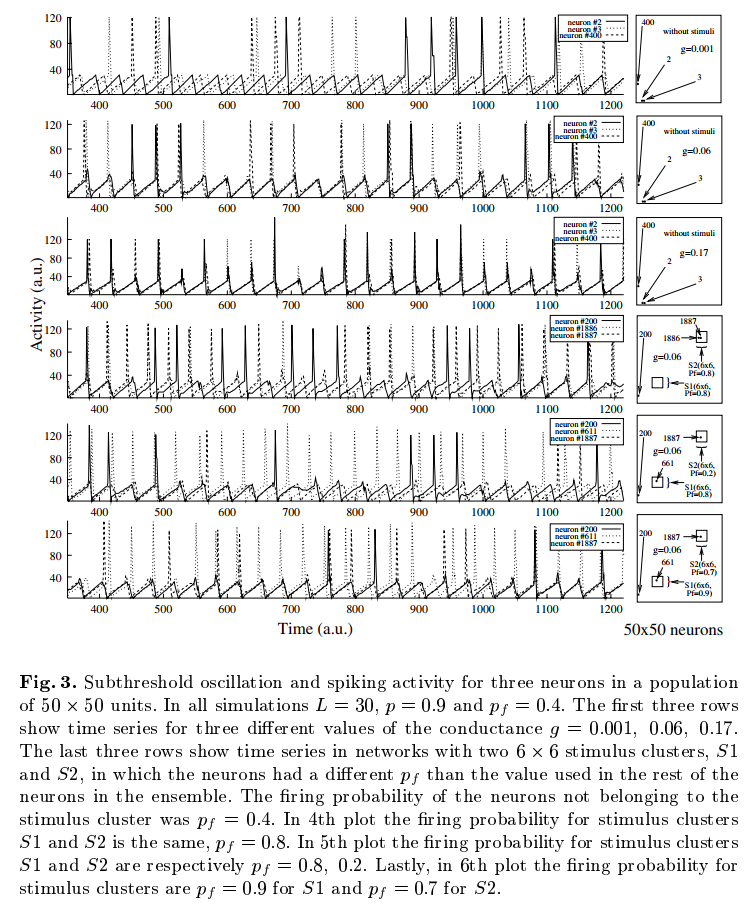

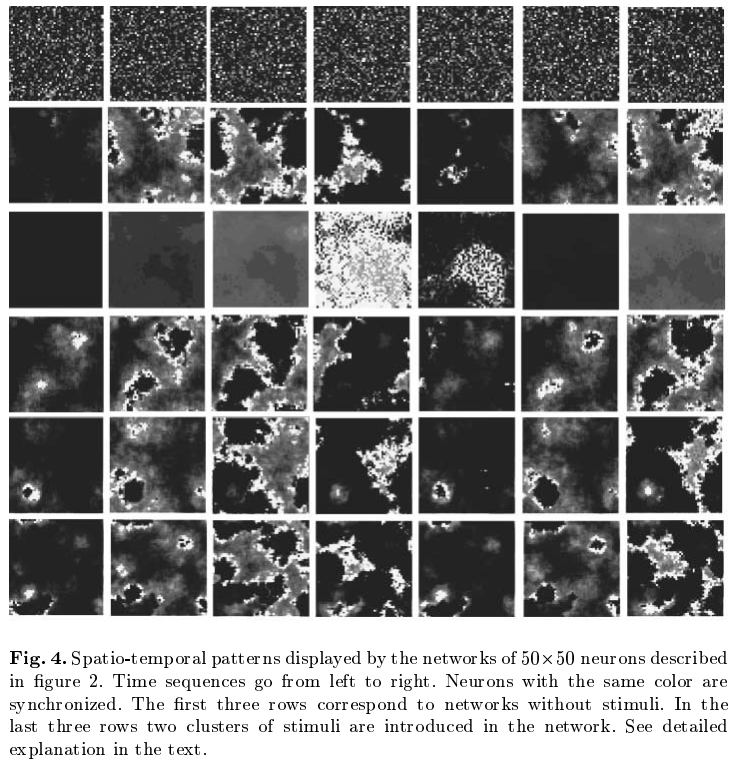

In [ ]:
image_path = '/content/drive/MyDrive/Prácticas NEI/Practica 4 Francisco/P4/imgs/fig3.png'

display(Image(filename=image_path, width=500, height=300))

image_path = '/content/drive/MyDrive/Prácticas NEI/Practica 4 Francisco/P4/imgs/fig4.png'

display(Image(filename=image_path, width=500, height=300))

In [ ]:
grid_dim = (50, 50, len(ParameterEnum))
grid = np.zeros(grid_dim)

a_ini = a_old = 0
p = 0.9
p_f = 0.4
C_p = 1
L = 30
L_spike = 3 * L
C_spike = L
C_no_spike = L/5

common_values_dict = {
    ParameterEnum.A_T.name: a_ini,
    ParameterEnum.A_T_OLD.name: a_old,
    ParameterEnum.P.name: p,
    ParameterEnum.P_F.name: 1-p_f,
    ParameterEnum.C_P.name: C_p,
    ParameterEnum.L.name: L,
    ParameterEnum.L_SPIKE.name: L_spike,
    ParameterEnum.C_SPIKE.name: C_spike,
    ParameterEnum.C_NO_SPIKE.name: C_no_spike,
    ParameterEnum.STAT.name: SUBTHRESHOLD
}

common_values_dict, grid.shape


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0},
 (50, 50, 14))

### Rejilla de neuronas con osciladores desacoplados ( $g=0,001$)

In [ ]:
g_first_sim = 0.001

values_dict_first_sim = common_values_dict.copy()

values_dict_first_sim[ParameterEnum.G_1.name] =\
    values_dict_first_sim[ParameterEnum.G_2.name] =\
    values_dict_first_sim[ParameterEnum.G_3.name] =\
    values_dict_first_sim[ParameterEnum.G_4.name] = g_first_sim

grid_first_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_first_sim)

values_dict_first_sim, grid_first_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.001,
  'G_2': 0.001,
  'G_3': 0.001,
  'G_4': 0.001},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, 

#### Representación de los potenciales de las neuronas

Las neuronas representadas corresponderán con los siguientes índices:
- Índice 2: $[49, 2]$
- Índice 3: $[49, 3]$
- Índice 400: $[41, 0]$

En los resultados extraídos se puede observar que la conductancia aportada es demasiado baja, dando lugar a que apenas se perciba un acoplamiento entre las neuronas representadas.



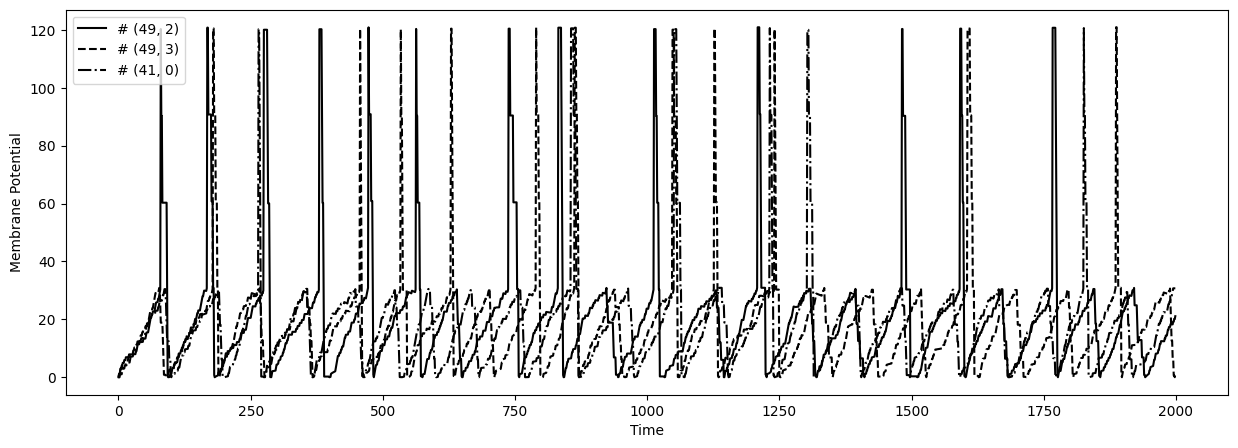

In [ ]:
grid_first_walk = random_walk(
    grid_first_sim, STEPS)

plot_grid_cells(
    grid_first_walk,
    [(49, 2), (49, 3), (41, 0)],
    ['-', '--', '-.'])

### Rejilla de neuronas con valores de conductancia ($g=0,06$)



In [ ]:
g_second_sim = 0.06

values_dict_second_sim = common_values_dict.copy()

values_dict_second_sim[ParameterEnum.G_1.name] =\
    values_dict_second_sim[ParameterEnum.G_2.name] =\
    values_dict_second_sim[ParameterEnum.G_3.name] =\
    values_dict_second_sim[ParameterEnum.G_4.name] = g_second_sim

grid_second_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_second_sim)

values_dict_second_sim, grid_second_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.06,
  'G_2': 0.06,
  'G_3': 0.06,
  'G_4': 0.06},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

#### Representación de los potenciales de las neuronas

Las neuronas representadas corresponderán con los siguientes índices:
- Índice 2: $[49, 2]$
- Índice 3: $[49, 3]$
- Índice 400: $[41, 0]$

En los resultados extraídos se puede observar que la conductancia aportada no es suficiente para obtener una adecuada sincronización entre las neuronas.
Específicamente visualizaremos las neuronas con los índices:




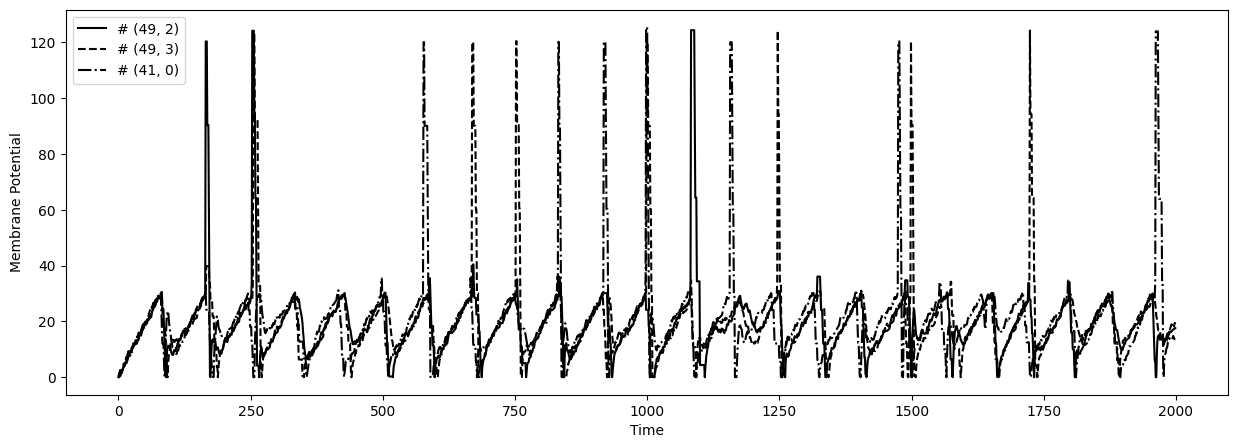

In [ ]:
grid_second_walk = random_walk(
    grid_second_sim, STEPS)

plot_grid_cells(
    grid_second_walk,
    [(49, 2), (49, 3), (41, 0)],
    ['-', '--', '-.'])


### Rejilla de neuronas con osciladores sincronizados ($g=0,17$)



In [ ]:
g_third_sim = 0.17

values_dict_third_sim = common_values_dict.copy()

values_dict_third_sim[ParameterEnum.G_1.name] =\
    values_dict_third_sim[ParameterEnum.G_2.name] =\
    values_dict_third_sim[ParameterEnum.G_3.name] =\
    values_dict_third_sim[ParameterEnum.G_4.name] = g_third_sim

grid_third_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_third_sim)

values_dict_third_sim, grid_third_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.17,
  'G_2': 0.17,
  'G_3': 0.17,
  'G_4': 0.17},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

#### Representación de los potenciales de las neuronas

Las neuronas representadas corresponderán con los siguientes índices:
- Índice 2: $[49, 2]$
- Índice 3: $[49, 3]$
- Índice 400: $[41, 0]$

En los resultados extraídos se puede observar que la conductancia permite la sincronización entre las neuronas, con un leve desfase, dando lugar a que apenas se perciba un acoplamiento entre las neuronas representadas.


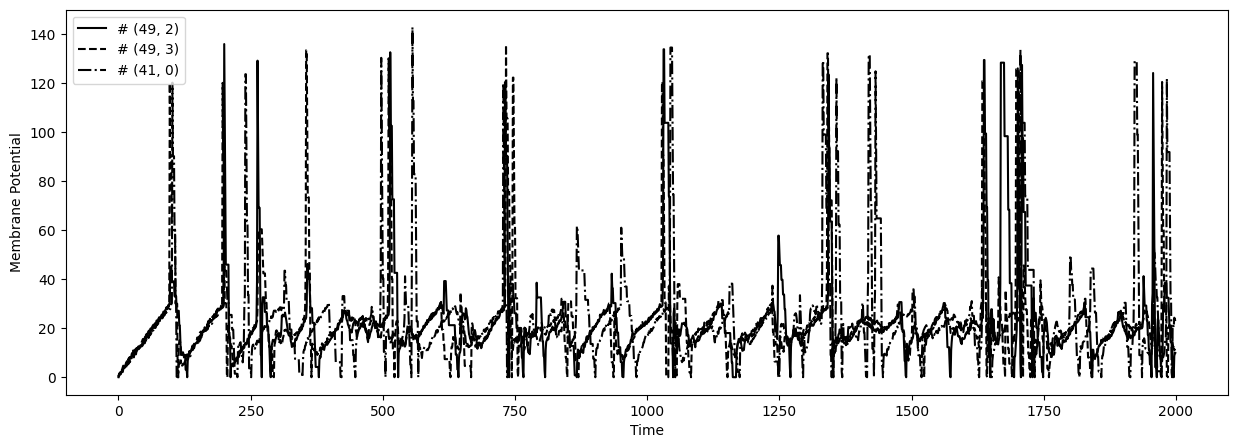

In [ ]:
grid_third_walk = random_walk(
    grid_third_sim, STEPS)

plot_grid_cells(
    grid_third_walk,
    [(49, 2), (49, 3), (41, 0)],
    ['-', '--', '-.'])


### Rejilla de neuronas con clústeres de estimulación

Se empleará un cluster con $ 6 x 6 $ neuronas, cada uno de los cuales presentará una probabilidad disparo distinta.

En este apartado se utilizará dos clústeres ($S_1, S_2$) cuyo posicionamiento ha sido seleccionado en función de las indicaciones aportadas por el artículo
#### -$S_1$: $[36,11]$
#### -$S_2$: $[12,37]$

Parámetros:
#### -$g = 0.06$.
#### -$p_{f_{S_1}} = 0.8$
#### -$p_{f_{S_2}} = 0.8$

In [ ]:
g_fourth_sim = 0.06

values_dict_fourth_sim = common_values_dict.copy()

values_dict_fourth_sim[ParameterEnum.G_1.name] =\
    values_dict_fourth_sim[ParameterEnum.G_2.name] =\
    values_dict_fourth_sim[ParameterEnum.G_3.name] =\
    values_dict_fourth_sim[ParameterEnum.G_4.name] = g_fourth_sim

grid_fourth_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_fourth_sim)

values_dict_fourth_sim, grid_fourth_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.06,
  'G_2': 0.06,
  'G_3': 0.06,
  'G_4': 0.06},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

In [ ]:
# We want a 6x6 cluster
S1_fourth_sim_ref = (36, 11)
S1_fourth_sim_vert_ref = (2, 3)
S1_fourth_sim_horiz_ref = (2, 3)
p_f_S1_fourth_sim = 0.8

S1_values_dict_fourth_sim = values_dict_fourth_sim.copy()
S1_values_dict_fourth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S1_fourth_sim

grid_fourth_sim = create_cluster_with_dict(
    grid_fourth_sim,
    S1_fourth_sim_ref,
    S1_fourth_sim_vert_ref,
    S1_fourth_sim_horiz_ref,
    S1_values_dict_fourth_sim
)

# We want a 6x6 cluster
S2_fourth_sim_ref = (12, 37)
S2_fourth_sim_vert_ref = (3, 2)
S2_fourth_sim_horiz_ref = (2, 3)
p_f_S2_fourth_sim = 0.8

S2_values_dict_fourth_sim = values_dict_fourth_sim.copy()
S2_values_dict_fourth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S2_fourth_sim

grid_fourth_sim = create_cluster_with_dict(
    grid_fourth_sim, S2_fourth_sim_ref,
    S2_fourth_sim_vert_ref,
    S2_fourth_sim_horiz_ref,
    S2_values_dict_fourth_sim
)


#### Representación de los potenciales de las neuronas

Las neuronas representadas corresponderán con los siguientes índices:
- Índice 200: $[45, 0]$
- Índice 1886: $[12, 36]$
- Índice 1887: $[12, 37]$

Como se desprende de los resultados, la sincronización entre las neuronas representadas por las dos líneas de puntos se debe a que están contenidas en el mismo cluster. En cambio, las neuronas representadas por las líneas continuas son más difíciles de sincronizar debido a su alejamiento del clúster.



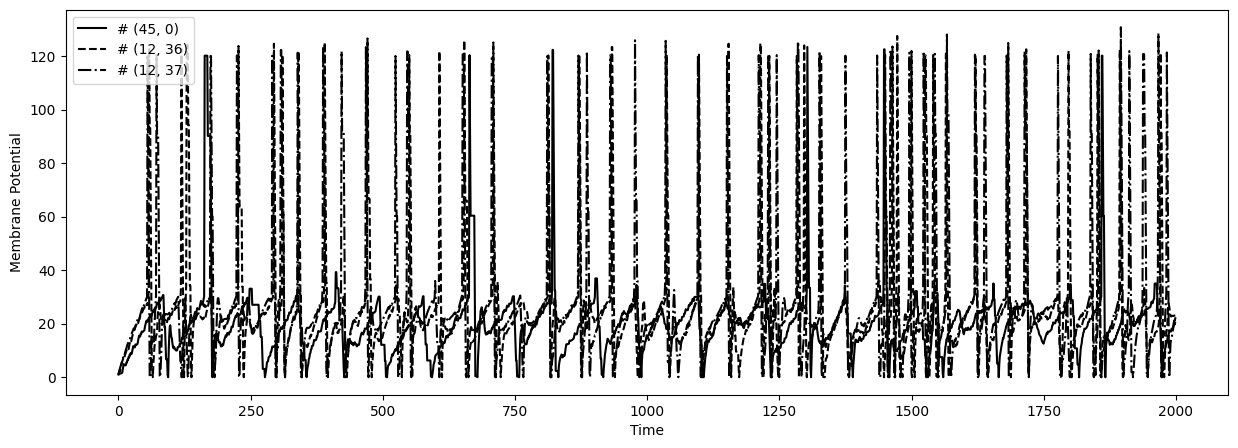

In [ ]:
grid_fourth_walk = random_walk(
    grid_fourth_sim, STEPS)

plot_grid_cells(
    grid_fourth_walk,
    [(45, 0), (12, 36), (12, 37)],
    ['-', '--', '-.'])


### Rejilla de neuronas con clústeres de estimulación y sumidero (quinta fila en las imágenes)

Se empleará un cluster con $ 6 x 6 $ neuronas, cada uno de los cuales presentará una probabilidad disparo distinta.

En este apartado se utilizará dos clústeres ($S_1, S_2$) cuyo posicionamiento ha sido seleccionado en función de las indicaciones aportadas por el artículo
#### -$S_1$: $[36,11]$
#### -$S_2$: $[12,37]$

Parámetros:
#### -$g = 0.06$.
#### -$p_{f_{S_1}} = 0.8$
#### -$p_{f_{S_2}} = 0.2$


In [ ]:
g_fifth_sim = 0.06

values_dict_fifth_sim = common_values_dict.copy()

values_dict_fifth_sim[ParameterEnum.G_1.name] =\
    values_dict_fifth_sim[ParameterEnum.G_2.name] =\
    values_dict_fifth_sim[ParameterEnum.G_3.name] =\
    values_dict_fifth_sim[ParameterEnum.G_4.name] = g_fifth_sim

grid_fifth_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_fifth_sim)

values_dict_fifth_sim, grid_fifth_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.06,
  'G_2': 0.06,
  'G_3': 0.06,
  'G_4': 0.06},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

In [ ]:
# We want a 6x6 cluster
S1_fifth_sim_ref = (36, 11)
S1_fifth_sim_vert_ref = (2, 3)
S1_fifth_sim_horiz_ref = (2, 3)
p_f_S1_fifth_sim = 0.8

S1_values_dict_fifth_sim = values_dict_fifth_sim.copy()
S1_values_dict_fifth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S1_fifth_sim

grid_fifth_sim = create_cluster_with_dict(
    grid_fifth_sim,
    S1_fifth_sim_ref,
    S1_fifth_sim_vert_ref,
    S1_fifth_sim_horiz_ref,
    S1_values_dict_fifth_sim
)

# We want a 6x6 cluster
S2_fifth_sim_ref = (12, 37)
S2_fifth_sim_vert_ref = (3, 2)
S2_fifth_sim_horiz_ref = (2, 3)
p_f_S2_fifth_sim = 0.2

S2_values_dict_fifth_sim = values_dict_fifth_sim.copy()
S2_values_dict_fifth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S2_fifth_sim

grid_fifth_sim = create_cluster_with_dict(
    grid_fifth_sim, S2_fifth_sim_ref,
    S2_fifth_sim_vert_ref,
    S2_fifth_sim_horiz_ref,
    S2_values_dict_fifth_sim
)



#### Representación de los potenciales de las neuronas

Las neuronas representadas corresponderán con los siguientes índices:
- Índice 200: $[45, 0]$
- Índice 661: $[36, 11]$
- Índice 1887: $[12, 37]$

En los resultados extraídos se puede observar que cierta sincronización entre las neuronas. Las neuronas representadas por líneas discontinuas tienen una mayor probabilidad de dispararse que otras neuronas.


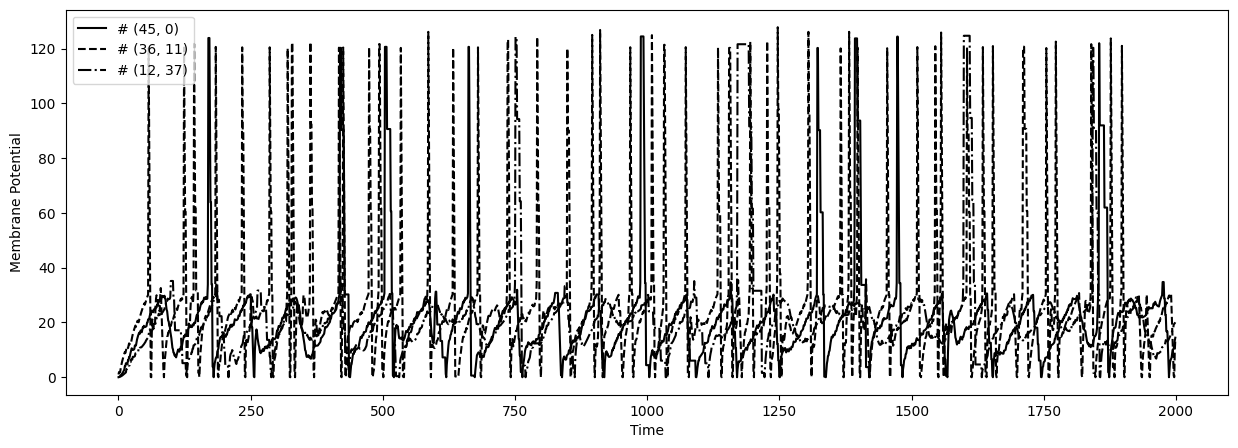

In [ ]:
grid_fifth_walk = random_walk(
    grid_fifth_sim, STEPS)

plot_grid_cells(
    grid_fifth_walk,
    [(45, 0), (36, 11), (12, 37)],
    ['-', '--', '-.'])


### Rejilla de neurona con clústeres de estimulación

Se empleará un cluster con $ 6 x 6 $ neuronas, cada uno de los cuales presentará una probabilidad disparo distinta.

En este apartado se utilizará dos clústeres ($S_1, S_2$) cuyo posicionamiento ha sido seleccionado en función de las indicaciones aportadas por el artículo
#### -$S_1$: $[36,11]$
#### -$S_2$: $[12,37]$

Parámetros:
#### -$g = 0.06$.
#### -$p_{f_{S_1}} = 0.9$
#### -$p_{f_{S_2}} = 0.7$


In [ ]:
g_sixth_sim = 0.06

values_dict_sixth_sim = common_values_dict.copy()

values_dict_sixth_sim[ParameterEnum.G_1.name] =\
    values_dict_sixth_sim[ParameterEnum.G_2.name] =\
    values_dict_sixth_sim[ParameterEnum.G_3.name] =\
    values_dict_sixth_sim[ParameterEnum.G_4.name] = g_sixth_sim

grid_sixth_sim = set_all_cells(
    grid, dict_init_fn, _dict=values_dict_sixth_sim)

values_dict_sixth_sim, grid_sixth_sim


({'A_T': 0,
  'A_T_OLD': 0,
  'P': 0.9,
  'P_F': 0.6,
  'C_P': 1,
  'L': 30,
  'L_SPIKE': 90,
  'C_SPIKE': 30,
  'C_NO_SPIKE': 6.0,
  'STAT': 0,
  'G_1': 0.06,
  'G_2': 0.06,
  'G_3': 0.06,
  'G_4': 0.06},
 array([[[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         ...,
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ]],
 
        [[ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ..., 30. ,  6. ,  0. ],
         [ 0. ,  0. ,  0.9, ...,

In [ ]:
# We want a 6x6 cluster
S1_sixth_sim_ref = (36, 11)
S1_sixth_sim_vert_ref = (2, 3)
S1_sixth_sim_horiz_ref = (2, 3)
p_f_S1_sixth_sim = 0.9

S1_values_dict_sixth_sim = values_dict_sixth_sim.copy()
S1_values_dict_sixth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S1_sixth_sim

grid_sixth_sim = create_cluster_with_dict(
    grid_sixth_sim,
    S1_sixth_sim_ref,
    S1_sixth_sim_vert_ref,
    S1_sixth_sim_horiz_ref,
    S1_values_dict_sixth_sim
)

# We want a 6x6 cluster
S2_sixth_sim_ref = (12, 37)
S2_sixth_sim_vert_ref = (3, 2)
S2_sixth_sim_horiz_ref = (2, 3)
p_f_S2_sixth_sim = 0.7

S2_values_dict_sixth_sim = values_dict_sixth_sim.copy()
S2_values_dict_sixth_sim[ParameterEnum.P_F.name] =\
    1 - p_f_S2_sixth_sim

grid_sixth_sim = create_cluster_with_dict(
    grid_sixth_sim, S2_sixth_sim_ref,
    S2_sixth_sim_vert_ref,
    S2_sixth_sim_horiz_ref,
    S2_values_dict_sixth_sim
)



#### Representación de los potenciales de las neuronas

Las neuronas representadas corresponderán con los siguientes índices:
- Índice 200: $[45, 0]$
- Índice 661: $[36, 11]$
- Índice 1887: $[12, 37]$

En los resultados extraídos se puede observar la sincronización es alta. Esto puede ser debido a que cuando una neurona dispara, la otra se encuentra en el periodo de recuperación. En cambio, esta sincronización tan alta no era conseguida si utilizaban sendas probabilidades iguales.




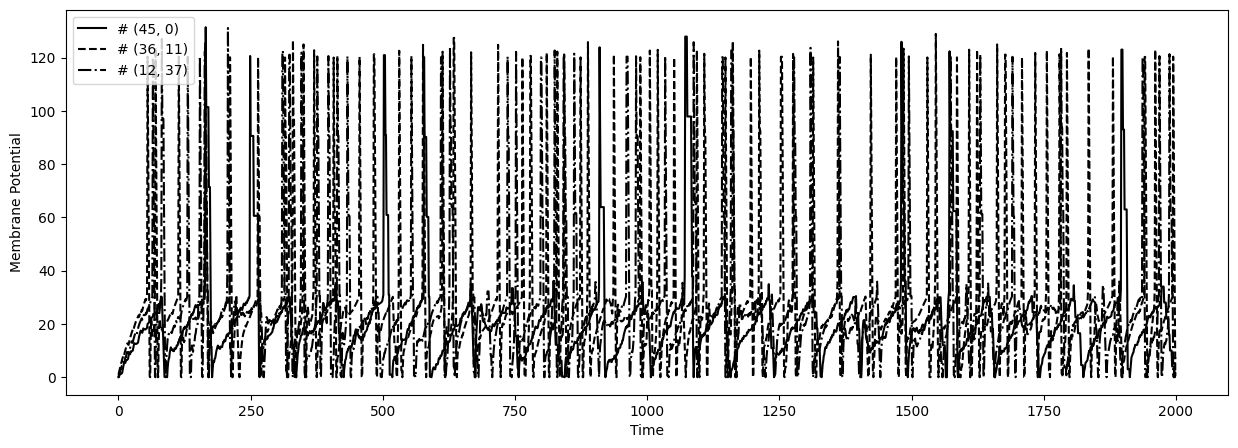

In [ ]:
grid_sixth_walk = random_walk(
    grid_sixth_sim, STEPS)

plot_grid_cells(
    grid_sixth_walk,
    [(45, 0), (36, 11), (12, 37)],
    ['-', '--', '-.'])


# Conclusiones

Para desarrollar nuestro modelo, nos basamos en el artículo "Stochastic networks with subthreshold oscillations and spiking activity", que propone una forma sencilla y escalable de simular comportamientos subumbrales sin replicar exactamente el comportamiento de neuronas tipo Hodgkin-Huxley o Hindmarsh-Rose, lo que reduce los altos costos computacionales asociados a las funciones sigmoidales. El modelo utiliza un caminante aleatorio controlado por una variable aleatoria "C", encapsulando así gran parte de la complejidad de la red neuronal. Esto es pertinente ya que cada neurona cuenta con múltiples canales iónicos que varían en conductancia y comportamiento, haciendo coherente el uso de modelos estocásticos para abordar esta complejidad. Se empleó una rejilla circular para evitar la desaceleración de la actividad y la extinción de patrones en los bordes, que actuarían como pseudo-sumideros. Esta estocasticidad añadida permite al sistema replicar una amplia variedad de comportamientos observados en redes reales, generando patrones mediante la variación de la conductancia entre conexiones y formando clústeres de distintas probabilidades de disparo, ofreciendo una diversidad de comportamientos modelables sin un uso excesivo de recursos computacionales.



Definimos la actividad subumbral en las neuronas como la actividad eléctrica que se presenta en la membrana celular de la neurona, cuando no hay estímulos lo suficientemente intensos como para generar un potencial de acción.

Esta actividad se caracteriza por ser repetitiva en el espacio y en el tiempo y poseer un bajo nivel de variabilidad. Parece que tal actividad es típica de ciertas neuronas que sostienen el flujo de iones mediante múltiples canales iónicos en su membrana.

A continuación, vamos a enumerar los posibles propósitos de la actividad subumbral.


### La sincronización a través de la actividad subumbral

La actividad subumbral ayuda a sincronizar la red neuronal, regulando la frecuencia de disparo y creando patrones de actividad complejos necesarios para funciones como la coordinación motora. La magnitud de la conductancia y el número de vecinos eléctricamente acoplados influyen en la formación de patrones espaciotemporales y en las descargas neuronales. Un acoplamiento débil puede hacer que la actividad sea casi independiente y no se formen patrones coherentes, mientras que un acoplamiento fuerte puede homogeneizar excesivamente la actividad, reduciendo la capacidad de generar patrones espaciales distintivos. Más vecinos eléctricamente acoplados mejoran la sincronización y la coherencia espacial de los patrones, y la falta de actividad subumbral podría complicar la coordinación y sincronización de la red.

### La actividad subumbral en su función discriminativa

La actividad subumbral es fundamental para diferenciar estímulos y eventos, influenciando la excitabilidad neuronal y la integración de señales sinápticas. Los potenciales subumbrales pueden amplificar o atenuar las señales sinápticas, afectando la probabilidad de un potencial de acción y permitiendo a las neuronas procesar información de manera eficiente. Este proceso incluye el fenómeno de "resonancia", donde las neuronas responden preferentemente a estímulos de ciertas frecuencias, lo cual es clave para la codificación y el procesamiento eficaz de la información.

### La actividad subumbral y su impacto en la plasticidad neuronal

La actividad subumbral es crucial para que las neuronas ajusten su fuerza sináptica y conexiones en respuesta a estímulos ambientales, lo que contribuye a la plasticidad neuronal. Esta capacidad permite adaptaciones a corto y largo plazo en la estructura y función de las neuronas y redes neuronales, incluyendo cambios en la fuerza y eficacia de las conexiones sinápticas y la formación de nuevas sinapsis o reestructuraciones de la red. Estos cambios son esenciales para la adaptación del sistema nervioso a nuevas experiencias y aprendizajes.

En general, las simulaciones de redes estocásticas revelan que la dinámica subumbral es crucial para la propagación de frentes de onda de actividad eléctrica en la red. La dinámica subumbral se refiere a las fluctuaciones menores del potencial de membrana de las neuronas antes de alcanzar el umbral necesario para desencadenar un potencial de acción. Estas fluctuaciones pueden influir en cómo las neuronas responden a señales cercanas al umbral, aumentando o disminuyendo la propagación del frente de onda. En modelos de redes estocásticas, mediante la simulación de diversos patrones de conexión y niveles de acoplamiento eléctrico, se puede observar cómo la dinámica subumbral afecta la sincronización y la propagación de ondas en toda la red. Específicamente, esta dinámica puede facilitar o retrasar la formación y propagación de ondas eléctricas, lo que es fundamental para entender la actividad neuronal compleja y los mecanismos de propagación de estados patológicos como los ataques epilépticos.